#建立資料夾


In [ ]:
import os
os.mkdir('data')
os.mkdir('data/dat')
os.mkdir('data/test')
os.mkdir('data/train')

#安裝 CUDA 在 Google Colab GPU's
參考資料:https://stackoverflow.com/questions/50560395/how-to-install-cuda-in-google-colab-gpus

In [ ]:
pip install mxnet-cu90==1.1.0

In [ ]:
#檢查 GPU 是否正在運行
!nvidia-smi

Sun Nov 21 04:57:38 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#檢查 PyTorch 是否能夠使用 GPU
import torch
torch.cuda.is_available()

True

In [ ]:
#要檢查 TensorFlow 是否能夠使用 GPU
import tensorflow as tf
tf.test.gpu_device_name()
# 標準輸出：'/device:GPU:0'

'/device:GPU:0'

#程式執行

In [ ]:
import dlib
import cv2
import imutils
import glob
import os
import io
import numpy as np
import time
from google.colab.patches import cv2_imshow

In [ ]:
# 人臉對齊
detector = dlib.get_frontal_face_detector()

# 人臉68特徵點模型路徑
predictor_path = "data/dat/shape_predictor_68_face_landmarks.dat"

# 載入人臉特徵點檢測器
sp = dlib.shape_predictor(predictor_path)

# 人臉關鍵點模型
predictor = dlib.shape_predictor( 'data/dat/shape_predictor_68_face_landmarks.dat')

# 128維向量嵌入模型
face_rec_model_path = "data/dat/dlib_face_recognition_resnet_model_v1.dat"

# 載入人臉辨識檢測器
facerec = dlib.face_recognition_model_v1(face_rec_model_path)

# 比對人臉描述子列表
descriptors = []

# 欲比對人臉名稱列表
candidate = []

In [ ]:
glob.glob(os.path.join('data/train','*.jpg'))
glob.glob(os.path.join('data/test/','*.jpg'))

['data/test/5.jpg',
 'data/test/4.jpg',
 'data/test/2.jpg',
 'data/test/3.jpg',
 'data/test/1.jpg',
 'data/test/6.jpg']

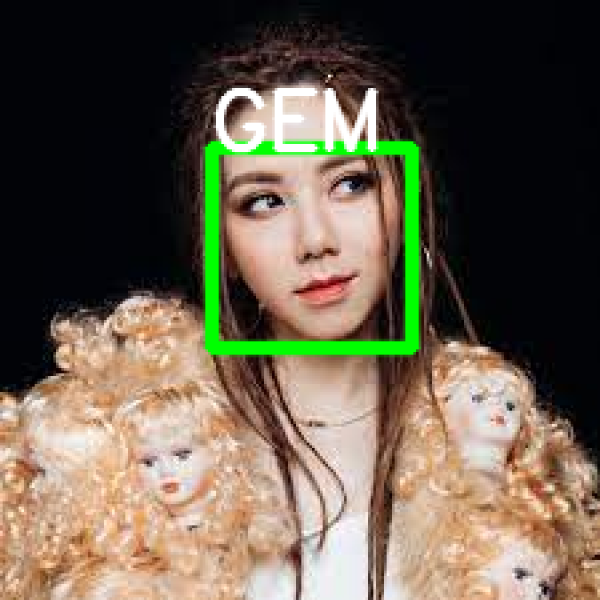

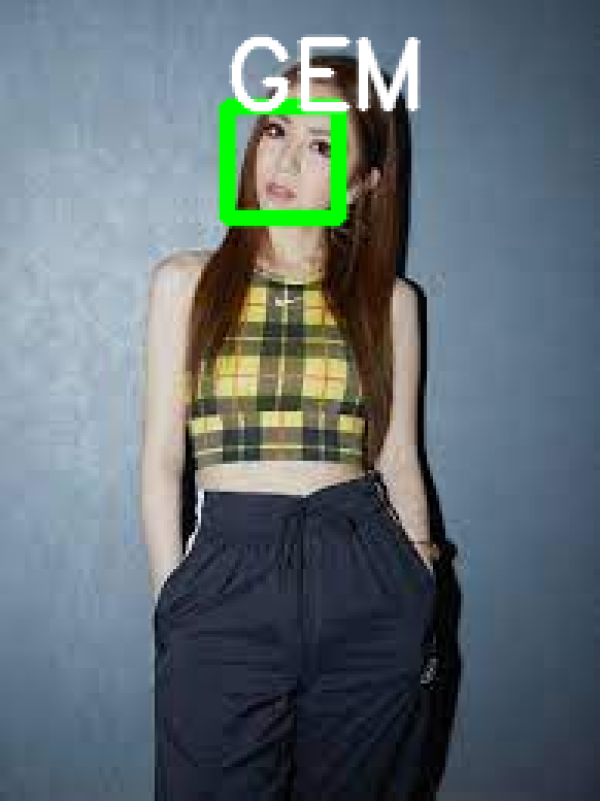

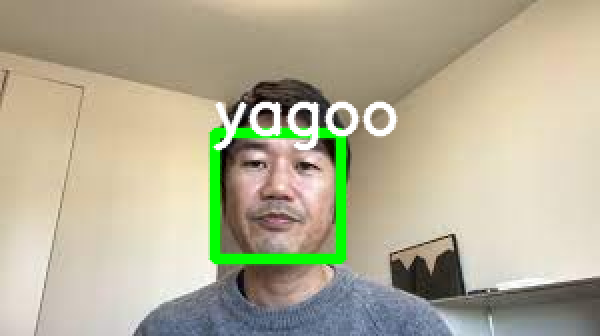

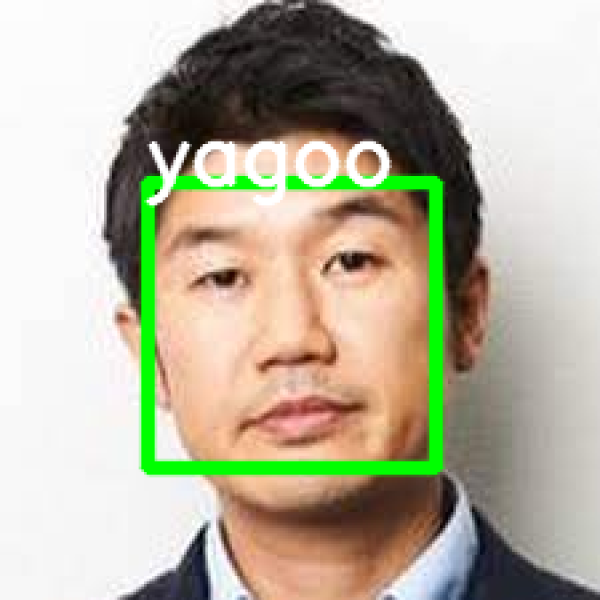

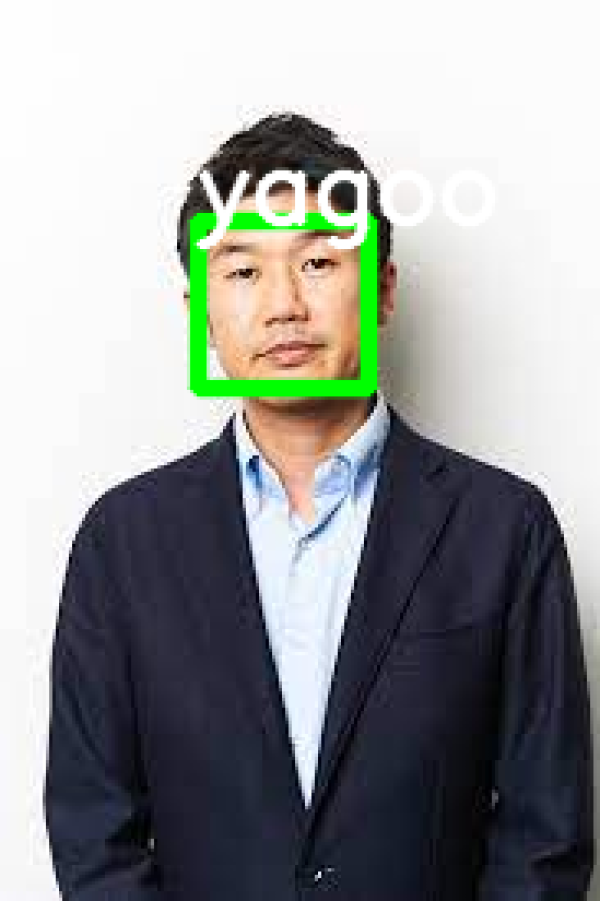

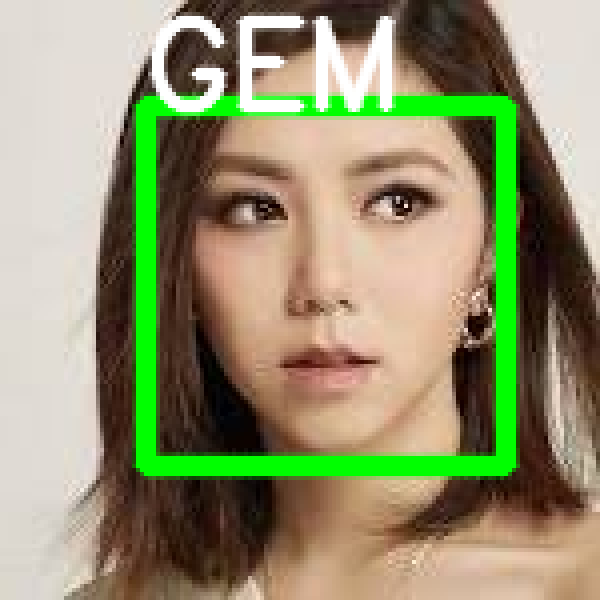

In [ ]:
# 針對比對資料夾裡每張圖片做比對:
# 1.人臉偵測
# 2.特徵點偵測
# 3.取得描述子

#我在 C:/Users/user/Desktop/專題/測試用/人臉/data/train 裡存放要辨識人及姓名(必須英文)-檔名即姓名
for f in glob.glob(os.path.join('data/train','*.jpg')):
  base = os.path.basename(f)
  # 依序取得圖片檔案人名
  candidate.append(os.path.splitext(base)[ 0])
  img = cv2.imread(f)

  # 1.人臉偵測
  dets = detector(img, 1)

  for k, d in enumerate(dets):
    # 2.特徵點偵測
    shape = sp(img, d)
 
    # 3.取得描述子，128維特徵向量
    face_descriptor = facerec.compute_face_descriptor(img, shape)

    # 轉換numpy array格式
    v = numpy.array(face_descriptor)
    descriptors.append(v)

# 針對需要辨識的人臉同樣進行處理
#我要辨識 C:/Users/user/Desktop/專題/測試用/人臉/data/test/1.jpg 這照片(必須jpg)
for f in glob.glob(os.path.join('data/test/','*.jpg')):
  base = os.path.basename(f)
  # 依序取得圖片檔案人名
  candidate.append(os.path.splitext(base)[ 0])
  img = cv2.imread(f)

  # 1.人臉偵測
  dets = detector(img, 1)
  dist = []
  for k, d in enumerate(dets):
    shape = sp(img, d)
    face_descriptor = facerec.compute_face_descriptor(img, shape)
    d_test = numpy.array(face_descriptor)

    x1 = d.left()
    y1 = d.top()
    x2 = d.right()
    y2 = d.bottom()
    # 以方框標示偵測的人臉
    cv2.rectangle(img, (x1, y1), (x2, y2), ( 0, 255, 0), 4, cv2. LINE_AA)
 
  # 計算歐式距離
  for i in descriptors:
    dist_ = numpy.linalg.norm(i -d_test)
    dist.append(dist_)

    # 將比對人名和比對出來的歐式距離組成一個dict
    c_d = dict( zip(candidate,dist))

    # 根據歐式距離由小到大排序
    cd_sorted = sorted(c_d.items(), key = lambda d:d[ 1])
    # 取得最短距離就為辨識出的人名
    rec_name = cd_sorted[ 0][ 0]
  # 將辨識出的人名印到圖片上面
  cv2.putText(img, rec_name, (x1, y1), cv2. FONT_HERSHEY_SIMPLEX , 1, ( 255, 255, 255), 2, cv2. LINE_AA)
  imgs = imutils.resize(img, width = 600)
  cv2_imshow(imgs)

#隨意Key一鍵結束程式
cv2.waitKey( 0)
cv2.destroyAllWindows()